<a href="https://colab.research.google.com/github/a00572092/Actividad-4.---Regresi-n-Simple/blob/main/Actividad_4_A00572092.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
#Cargar archivo csv desde seaborn
df=pd.read_csv('DF_Mexico.csv')
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,NaN,https://a0.muscache.com/pictures/db71951a-8696...,154670560,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,20230329041210,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7799414,...,NaN,NaN,NaN,NaN,t,13,13,0,0,NaN


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [259]:
value_counts = df['calendar_updated'].value_counts()
value_counts

Series([], Name: calendar_updated, dtype: int64)

In [260]:
#Limpieza de columnas
columns_to_drop = ['calendar_updated', 'license', 'bathrooms', 'neighbourhood_group_cleansed', 'id','host_id','host_name', 'listing_url','host_about','picture_url','host_picture_url','neighborhood_overview', 'description','host_about','scrape_id','name','host_thumbnail_url','amenities']
df = df.drop(columns=columns_to_drop)

In [261]:
#Conversión de tipo para mejor manejo
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

In [262]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [263]:
df['price'] = df['price'].str.replace(',', '')

In [264]:
df['price'] = df['price'].str.replace('$', '').astype(float)

<ipython-input-264-ecd34897e85c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').astype(float)


In [265]:
#Valores atipicos llenados
columnas = ['host_acceptance_rate', 'host_response_rate']
df[columnas] = df[columnas].fillna(0)
df.fillna(df.mean())

<ipython-input-265-0c52d5847176>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,last_scraped,source,host_url,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2023-03-30,city scrape,https://www.airbnb.com/users/show/10531228,2013-12-09,"Mexico City, Mexico",within a day,100.0,0.0,f,Coyoacán,...,5.000000,4.950000,5.000000,4.860000,f,3,3,0,0,0.190000
1,2023-03-30,city scrape,https://www.airbnb.com/users/show/16840050,2014-06-16,"Mexico City, Mexico",NaN,0.0,0.0,f,NaN,...,4.930000,5.000000,4.950000,4.840000,f,2,2,0,0,0.540000
2,2023-03-29,city scrape,https://www.airbnb.com/users/show/3531879,2012-09-10,"Mexico City, Mexico",within an hour,100.0,90.0,t,Centro Histórico,...,4.920000,4.920000,4.580000,4.710000,f,3,3,0,0,0.310000
3,2023-03-29,city scrape,https://www.airbnb.com/users/show/153786,2010-06-28,"Mexico City, Mexico",NaN,0.0,0.0,f,NaN,...,4.827133,4.815533,4.832627,4.708674,f,1,1,0,0,1.702435
4,2023-03-30,city scrape,https://www.airbnb.com/users/show/196253,2010-08-09,"Mexico City, Mexico",within an hour,100.0,86.0,f,Condesa,...,4.870000,4.780000,4.980000,4.480000,f,12,3,2,0,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,2023-03-30,city scrape,https://www.airbnb.com/users/show/488030249,2022-11-16,"Mexico City, Mexico",within an hour,100.0,100.0,f,NaN,...,4.827133,4.815533,4.832627,4.708674,f,2,2,0,0,1.702435
24220,2023-03-29,city scrape,https://www.airbnb.com/users/show/506816029,2023-03-24,NaN,NaN,0.0,0.0,f,NaN,...,4.827133,4.815533,4.832627,4.708674,t,1,1,0,0,1.702435
24221,2023-03-29,city scrape,https://www.airbnb.com/users/show/154670560,2017-10-15,"Mexico City, Mexico",NaN,0.0,96.0,f,NaN,...,4.827133,4.815533,4.832627,4.708674,f,1,0,1,0,1.702435
24222,2023-03-30,city scrape,https://www.airbnb.com/users/show/7799414,2013-07-29,"Mexico City, Mexico",within an hour,100.0,100.0,t,NaN,...,4.827133,4.815533,4.832627,4.708674,t,13,13,0,0,1.702435


In [266]:
df.fillna(method='bfill', inplace=True)

In [267]:
df.fillna(method='ffill', inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  24224 non-null  object 
 1   source                                        24224 non-null  object 
 2   host_url                                      24224 non-null  object 
 3   host_since                                    24224 non-null  object 
 4   host_location                                 24224 non-null  object 
 5   host_response_time                            24224 non-null  object 
 6   host_response_rate                            24224 non-null  float64
 7   host_acceptance_rate                          24224 non-null  float64
 8   host_is_superhost                             24224 non-null  object 
 9   host_neighbourhood                            24224 non-null 

In [269]:
#Utilización de las variables
room = df[["room_type",'property_type']]

In [270]:
#Método desviación estandar para eliminar los outliers6
y = df
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()
print("Límite superior permitido" , limite_superior)
print("\nLímite inferior permitido" , limite_inferior)

<ipython-input-270-e6ace18fc61f>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  limite_superior = y.mean() + 3*y.std()
<ipython-input-270-e6ace18fc61f>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  limite_superior = y.mean() + 3*y.std()


Límite superior permitido host_response_rate                                189.946229
host_acceptance_rate                              180.598718
host_listings_count                               252.830274
host_total_listings_count                         426.203015
latitude                                           19.532575
longitude                                         -99.065630
accommodates                                        9.933140
bedrooms                                            5.033385
beds                                                6.951269
price                                           56493.738888
minimum_nights                                     84.914542
maximum_nights                                   2018.371832
minimum_minimum_nights                             74.570438
maximum_minimum_nights                             75.639931
minimum_maximum_nights                           2164.914446
maximum_maximum_nights                           2164.36420

<ipython-input-270-e6ace18fc61f>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  limite_inferior = y.mean() - 3*y.std()
<ipython-input-270-e6ace18fc61f>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  limite_inferior = y.mean() - 3*y.std()


In [271]:
#Conversion atipico-nulo
df2 = df[(y <= limite_superior) & (y >=limite_inferior)]
df2

<ipython-input-271-5cff3506e251>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df[(y <= limite_superior) & (y >=limite_inferior)]


,last_scraped,source,host_url,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN,...,5.00,4.95,5.00,4.86,NaN,3.0,3.0,0.0,0.0,0.19
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,4.93,5.00,4.95,4.84,NaN,2.0,2.0,0.0,0.0,0.54
2,NaN,NaN,NaN,NaN,NaN,NaN,100.0,90.0,NaN,NaN,...,4.92,4.92,4.58,4.71,NaN,3.0,3.0,0.0,0.0,0.31
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,4.87,4.78,4.98,4.48,NaN,1.0,1.0,0.0,0.0,0.46
4,NaN,NaN,NaN,NaN,NaN,NaN,100.0,86.0,NaN,NaN,...,4.87,4.78,4.98,4.48,NaN,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,...,5.00,5.00,5.00,5.00,NaN,2.0,2.0,0.0,0.0,1.00
24220,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,5.00,5.00,5.00,5.00,NaN,1.0,1.0,0.0,0.0,1.00
24221,NaN,NaN,NaN,NaN,NaN,NaN,0.0,96.0,NaN,NaN,...,5.00,5.00,5.00,5.00,NaN,1.0,0.0,1.0,0.0,1.00
24222,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,...,5.00,5.00,5.00,5.00,NaN,13.0,13.0,0.0,0.0,1.00


In [272]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  0 non-null      object 
 1   source                                        0 non-null      object 
 2   host_url                                      0 non-null      object 
 3   host_since                                    0 non-null      object 
 4   host_location                                 0 non-null      object 
 5   host_response_time                            0 non-null      object 
 6   host_response_rate                            24224 non-null  float64
 7   host_acceptance_rate                          24224 non-null  float64
 8   host_is_superhost                             0 non-null      object 
 9   host_neighbourhood                            0 non-null     

In [273]:
df2.dropna(axis=1, how='all', inplace=True)

In [274]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            24224 non-null  float64
 1   host_acceptance_rate                          24224 non-null  float64
 2   host_listings_count                           23703 non-null  float64
 3   host_total_listings_count                     23735 non-null  float64
 4   latitude                                      23921 non-null  float64
 5   longitude                                     23572 non-null  float64
 6   accommodates                                  23687 non-null  float64
 7   bedrooms                                      24042 non-null  float64
 8   beds                                          23841 non-null  float64
 9   price                                         24188 non-null 

In [275]:
#Utilización de las variables
conservacion = ["host_acceptance_rate", "host_response_rate", "price", "number_of_reviews", "review_scores_location", "review_scores_cleanliness", "availability_365", "reviews_per_month", "review_scores_communication"]
df3 = df2[conservacion]
df3

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,0.0,100.0,1434.0,21.0,5.00,4.95,324,0.19,4.95
1,0.0,0.0,830.0,61.0,4.95,4.88,346,0.54,5.00
2,90.0,100.0,1469.0,39.0,4.58,4.71,87,0.31,4.92
3,0.0,0.0,3658.0,0.0,4.98,4.70,363,0.46,4.78
4,86.0,100.0,18000.0,64.0,4.98,4.70,357,0.46,4.78
...,...,...,...,...,...,...,...,...,...
24219,100.0,100.0,760.0,0.0,5.00,5.00,352,1.00,5.00
24220,0.0,0.0,1520.0,0.0,5.00,5.00,365,1.00,5.00
24221,96.0,0.0,533.0,0.0,5.00,5.00,180,1.00,5.00
24222,100.0,100.0,1200.0,0.0,5.00,5.00,344,1.00,5.00


In [276]:
df4 = pd.concat([room, df3], axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    24224 non-null  object 
 1   property_type                24224 non-null  object 
 2   host_acceptance_rate         24224 non-null  float64
 3   host_response_rate           24224 non-null  float64
 4   price                        24188 non-null  float64
 5   number_of_reviews            23660 non-null  float64
 6   review_scores_location       23848 non-null  float64
 7   review_scores_cleanliness    23742 non-null  float64
 8   availability_365             24224 non-null  int64  
 9   reviews_per_month            23942 non-null  float64
 10  review_scores_communication  23794 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [277]:
df4.fillna(method='ffill',inplace=True)
df4.fillna(method='bfill',inplace=True)

In [278]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    24224 non-null  object 
 1   property_type                24224 non-null  object 
 2   host_acceptance_rate         24224 non-null  float64
 3   host_response_rate           24224 non-null  float64
 4   price                        24224 non-null  float64
 5   number_of_reviews            24224 non-null  float64
 6   review_scores_location       24224 non-null  float64
 7   review_scores_cleanliness    24224 non-null  float64
 8   availability_365             24224 non-null  int64  
 9   reviews_per_month            24224 non-null  float64
 10  review_scores_communication  24224 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


#SharedRoom

In [279]:
dfsr = df4[df4['room_type'] == 'Shared room']
dfsr

,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,Shared room,Shared room in rental unit,0.0,0.0,1815.0,0.0,4.98,4.92,365,0.69,4.94
437,Shared room,Shared room in condo,86.0,50.0,182.0,9.0,4.78,4.67,346,0.10,5.00
443,Shared room,Shared room in home,100.0,90.0,450.0,70.0,4.68,4.93,302,0.73,4.91
472,Shared room,Shared room in guesthouse,96.0,100.0,272.0,25.0,4.80,4.48,354,0.26,4.72
499,Shared room,Shared room in home,100.0,100.0,320.0,137.0,4.90,4.62,351,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...,...
23733,Shared room,Shared room in home,100.0,100.0,250.0,0.0,5.00,5.00,365,1.00,5.00
23762,Shared room,Shared room in tent,100.0,100.0,224.0,0.0,5.00,5.00,364,1.00,4.00
23894,Shared room,Shared room in rental unit,0.0,0.0,720.0,0.0,5.00,4.50,364,1.00,5.00
23898,Shared room,Shared room in rental unit,0.0,100.0,176.0,0.0,5.00,4.50,364,1.00,5.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

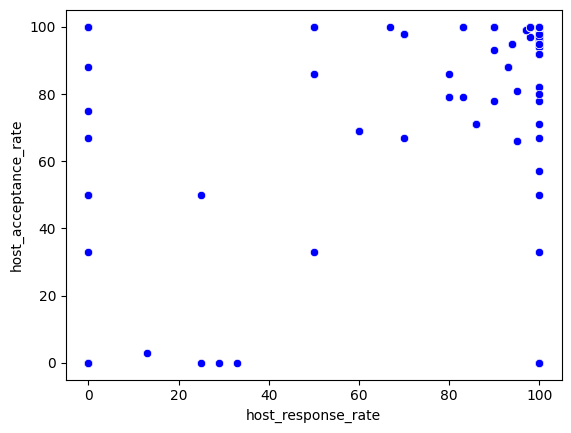

In [280]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfsr)

In [281]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['host_response_rate']]
Var_Dep= dfsr['host_acceptance_rate']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)


modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.64476514]),
 'rank_': 1,
 'singular_': array([716.68619758]),
 'intercept_': 27.95921592283043}

y=27.95+0.64x

In [282]:
y_pred= modelPR.predict(X=dfsr[['host_response_rate']])
y_pred

array([27.95921592, 60.19747297, 85.98807861, 92.43573002, 92.43573002,
       49.23646557, 89.21190431, 60.19747297, 85.98807861, 27.95921592,
       27.95921592, 92.43573002, 92.43573002, 89.21190431, 27.95921592,
       27.95921592, 92.43573002, 92.43573002, 27.95921592, 92.43573002,
       27.95921592, 92.43573002, 92.43573002, 27.95921592, 27.95921592,
       27.95921592, 27.95921592, 92.43573002, 27.95921592, 85.98807861,
       27.95921592, 27.95921592, 27.95921592, 36.34116276, 27.95921592,
       27.95921592, 66.64512438, 92.43573002, 27.95921592, 60.19747297,
       27.95921592, 27.95921592, 27.95921592, 27.95921592, 66.64512438,
       92.43573002, 27.95921592, 79.5404272 , 27.95921592, 46.65740501,
       92.43573002, 92.43573002, 92.43573002, 92.43573002, 92.43573002,
       92.43573002, 92.43573002, 92.43573002, 27.95921592, 27.95921592,
       27.95921592, 92.43573002, 92.43573002, 27.95921592, 92.43573002,
       92.43573002, 92.43573002, 27.95921592, 60.19747297, 27.95

In [283]:
dfsr1 = dfsr.copy()

In [284]:
dfsr1.insert(0, 'Predicciones', y_pred)
dfsr1

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,27.959216,Shared room,Shared room in rental unit,0.0,0.0,1815.0,0.0,4.98,4.92,365,0.69,4.94
437,60.197473,Shared room,Shared room in condo,86.0,50.0,182.0,9.0,4.78,4.67,346,0.10,5.00
443,85.988079,Shared room,Shared room in home,100.0,90.0,450.0,70.0,4.68,4.93,302,0.73,4.91
472,92.435730,Shared room,Shared room in guesthouse,96.0,100.0,272.0,25.0,4.80,4.48,354,0.26,4.72
499,92.435730,Shared room,Shared room in home,100.0,100.0,320.0,137.0,4.90,4.62,351,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
23733,92.435730,Shared room,Shared room in home,100.0,100.0,250.0,0.0,5.00,5.00,365,1.00,5.00
23762,92.435730,Shared room,Shared room in tent,100.0,100.0,224.0,0.0,5.00,5.00,364,1.00,4.00
23894,27.959216,Shared room,Shared room in rental unit,0.0,0.0,720.0,0.0,5.00,4.50,364,1.00,5.00
23898,92.435730,Shared room,Shared room in rental unit,0.0,100.0,176.0,0.0,5.00,4.50,364,1.00,5.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

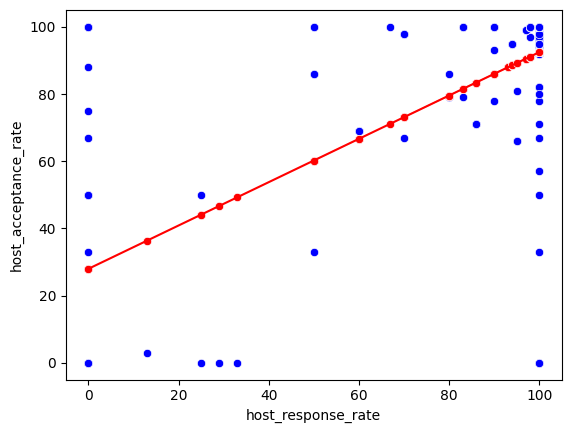

In [285]:
sns.scatterplot(x='host_response_rate',
                y='host_acceptance_rate',
                color="blue",
                data=dfsr1)
sns.scatterplot(x='host_response_rate',
                y='Predicciones',
                color="red",
                data=dfsr1)
sns.lineplot(x='host_response_rate',
             y='Predicciones',
             color="red",
             data=dfsr1)

In [286]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd01=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd01

0.5150301512148929

In [287]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc01=np.sqrt(cd01)
cc01

0.7176560117597378

<Axes: xlabel='price', ylabel='host_response_rate'>

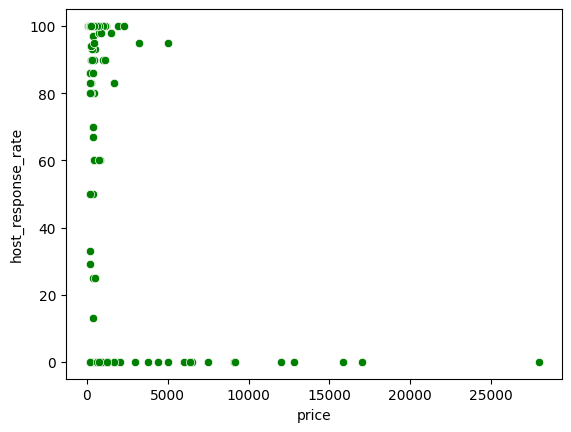

In [288]:
from turtle import color
sns.scatterplot(x='price', y='host_response_rate', color="green", data=dfsr)

In [289]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['price']]
Var_Dep= dfsr['host_acceptance_rate']


model = LinearRegression()

model.fit(X=Vars_Indep,y=Var_Dep)


model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00458466]),
 'rank_': 1,
 'singular_': array([43699.26481985]),
 'intercept_': 76.38185037127809}

y=76.38-0.0045x

In [290]:
y_pred= model.predict(X=dfsr[['price']])
y_pred

array([ 68.06069802,  75.54744281,  74.31875475,  75.13482368,
        74.91476015,  75.46491898,  53.32102594,  75.54744281,
        75.25402476,  58.96015399,  75.36405653,  72.71870947,
        72.71870947,  61.70636349,  21.36596705,  74.56632622,
        75.23568614,  75.23568614,  74.77722044,  75.48325761,
        74.7176199 ,  75.45116501,  67.64349424,  34.76691929,
        74.87349824,  75.3457179 ,  74.0895219 ,  73.0350508 ,
        75.00645329,  75.23568614,  75.143993  ,  74.31875475,
        75.46491898,  74.77722044,  75.50159624,  75.00645329,
        74.48838705,  75.46491898,  74.77722044,  75.3778105 ,
        70.42179634,  46.44862519,  73.63105621,  70.42179634,
        74.48838705,  75.87753811,  73.17259051,  74.31875475,
        74.0895219 ,  75.5061809 ,  74.86891358,  73.40182336,
        74.86891358,  71.79719343,  74.91017549,  75.23568614,
        74.86891358,  75.35030256,  62.62787954,  74.54798759,
        75.40073379,  73.88321234,  75.00645329,  74.54

In [291]:
dfsr2 = dfsr.copy()

In [292]:
#Insertamos la columna de predicciones en el DataFrame
dfsr2.insert(0, 'Predicciones', y_pred)
dfsr2

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,68.060698,Shared room,Shared room in rental unit,0.0,0.0,1815.0,0.0,4.98,4.92,365,0.69,4.94
437,75.547443,Shared room,Shared room in condo,86.0,50.0,182.0,9.0,4.78,4.67,346,0.10,5.00
443,74.318755,Shared room,Shared room in home,100.0,90.0,450.0,70.0,4.68,4.93,302,0.73,4.91
472,75.134824,Shared room,Shared room in guesthouse,96.0,100.0,272.0,25.0,4.80,4.48,354,0.26,4.72
499,74.914760,Shared room,Shared room in home,100.0,100.0,320.0,137.0,4.90,4.62,351,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
23733,75.235686,Shared room,Shared room in home,100.0,100.0,250.0,0.0,5.00,5.00,365,1.00,5.00
23762,75.354887,Shared room,Shared room in tent,100.0,100.0,224.0,0.0,5.00,5.00,364,1.00,4.00
23894,73.080897,Shared room,Shared room in rental unit,0.0,0.0,720.0,0.0,5.00,4.50,364,1.00,5.00
23898,75.574951,Shared room,Shared room in rental unit,0.0,100.0,176.0,0.0,5.00,4.50,364,1.00,5.00


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

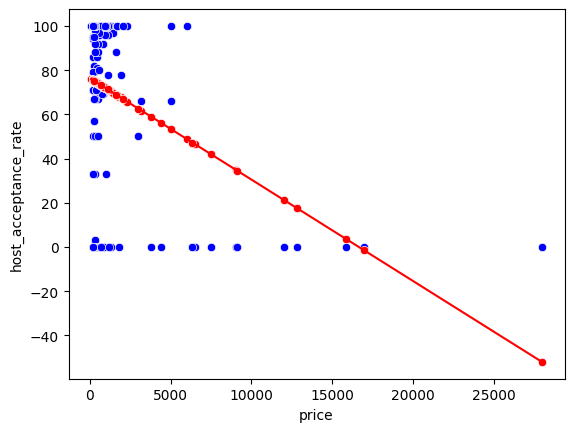

In [293]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price',
                y='host_acceptance_rate',
                color="blue",
                data=dfsr2)
sns.scatterplot(x='price',
                y='Predicciones',
                color="red",
                data=dfsr2)
sns.lineplot(x='price',
             y='Predicciones',
             color="red",
             data=dfsr2)

In [294]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd02=model.score(X=Vars_Indep, y=Var_Dep)
cd02

0.09681294340769875

In [295]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc02=np.sqrt(cd02)
cc02

0.3111477838707818

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

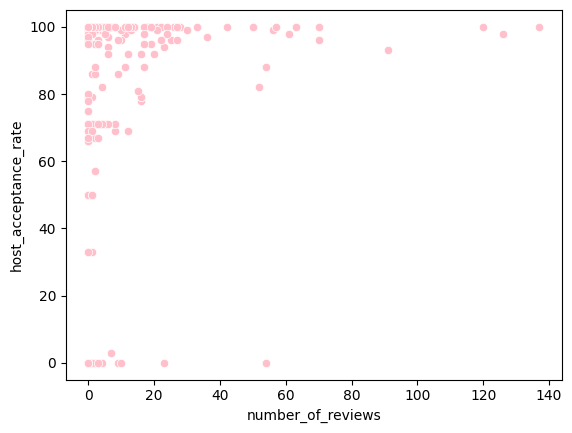

In [296]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=dfsr)

In [297]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['number_of_reviews']]
Var_Dep= dfsr['host_acceptance_rate']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)


modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.49317807]),
 'rank_': 1,
 'singular_': array([309.01946657]),
 'intercept_': 67.9908398154103}

y=67+0.49x

In [298]:
y_pred= modelPR.predict(X=dfsr[['number_of_reviews']])
y_pred

array([ 67.99083982,  72.42944241, 102.51330448,  80.32029148,
       135.55623493,  67.99083982,  67.99083982,  68.48401788,
       112.87004387,  67.99083982,  68.97719595,  75.88168888,
        73.90897661,  67.99083982,  67.99083982,  67.99083982,
        93.63609928,  69.96355208,  67.99083982,  70.94990821,
        67.99083982,  79.33393535,  75.88168888,  67.99083982,
        68.48401788,  67.99083982,  68.97719595, 127.1722078 ,
        68.48401788,  81.79982568,  68.48401788,  74.40215468,
        68.48401788,  71.44308628,  67.99083982,  67.99083982,
        71.93626435,  68.48401788,  67.99083982,  68.48401788,
        67.99083982,  67.99083982,  67.99083982,  69.47037402,
        73.90897661,  78.84075728,  68.48401788,  68.97719595,
        68.48401788,  69.96355208,  71.93626435,  70.45673015,
        69.47037402,  68.48401788,  77.36122308,  70.45673015,
        69.47037402,  69.47037402,  67.99083982,  68.48401788,
        72.42944241,  95.60881154,  98.07470188,  68.48

In [299]:
dfsr3 = dfsr.copy()

In [300]:
#Insertamos la columna de predicciones en el DataFrame
dfsr3.insert(0, 'Predicciones', y_pred)
dfsr3

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,67.990840,Shared room,Shared room in rental unit,0.0,0.0,1815.0,0.0,4.98,4.92,365,0.69,4.94
437,72.429442,Shared room,Shared room in condo,86.0,50.0,182.0,9.0,4.78,4.67,346,0.10,5.00
443,102.513304,Shared room,Shared room in home,100.0,90.0,450.0,70.0,4.68,4.93,302,0.73,4.91
472,80.320291,Shared room,Shared room in guesthouse,96.0,100.0,272.0,25.0,4.80,4.48,354,0.26,4.72
499,135.556235,Shared room,Shared room in home,100.0,100.0,320.0,137.0,4.90,4.62,351,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
23733,67.990840,Shared room,Shared room in home,100.0,100.0,250.0,0.0,5.00,5.00,365,1.00,5.00
23762,67.990840,Shared room,Shared room in tent,100.0,100.0,224.0,0.0,5.00,5.00,364,1.00,4.00
23894,67.990840,Shared room,Shared room in rental unit,0.0,0.0,720.0,0.0,5.00,4.50,364,1.00,5.00
23898,67.990840,Shared room,Shared room in rental unit,0.0,100.0,176.0,0.0,5.00,4.50,364,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

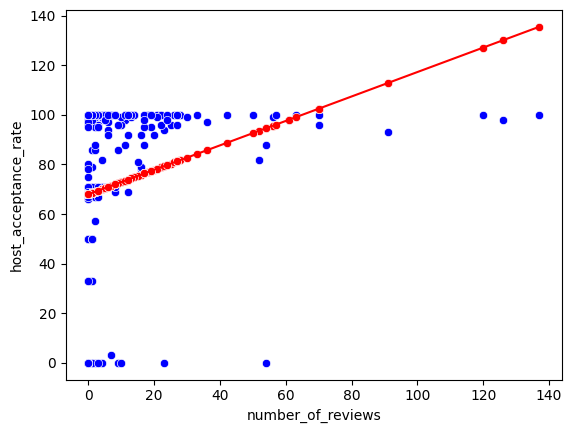

In [301]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews',
                y='host_acceptance_rate',
                color="blue",
                data=dfsr3)
sns.scatterplot(x='number_of_reviews',
                y='Predicciones',
                color="red",
                data=dfsr3)
sns.lineplot(x='number_of_reviews',
             y='Predicciones',
             color="red",
             data=dfsr3)

In [302]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd03=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd03

0.05602097445173371

In [303]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc03=np.sqrt(cd03)
cc03

0.2366875037929415

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

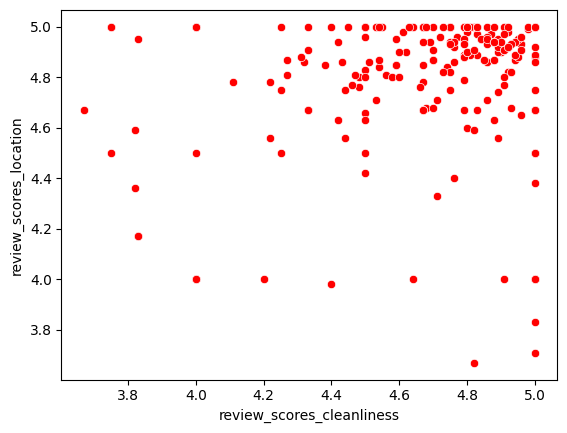

In [304]:
from turtle import color
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="red", data=dfsr)

In [305]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['review_scores_cleanliness']]
Var_Dep= dfsr['review_scores_location']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)


modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19538428]),
 'rank_': 1,
 'singular_': array([5.4098502]),
 'intercept_': 3.913788782969028}

y=3.91+0.19x

In [306]:
y_pred= modelPR.predict(X=dfsr[['review_scores_cleanliness']])
y_pred

array([4.87507943, 4.82623336, 4.87703327, 4.78911035, 4.81646415,
       4.87312559, 4.87898712, 4.89071017, 4.79497188, 4.88094096,
       4.79301803, 4.83014105, 4.87507943, 4.8828948 , 4.87703327,
       4.86531022, 4.84967947, 4.75980271, 4.87117174, 4.85749484,
       4.83209489, 4.83209489, 4.89071017, 4.83404873, 4.89071017,
       4.89071017, 4.85749484, 4.83991026, 4.89071017, 4.75784886,
       4.8418641 , 4.8418641 , 4.89071017, 4.86335637, 4.84967947,
       4.88680249, 4.86726406, 4.89071017, 4.77934113, 4.86726406,
       4.8692179 , 4.8145103 , 4.77738729, 4.8692179 , 4.82623336,
       4.66015672, 4.83600257, 4.89071017, 4.87898712, 4.8828948 ,
       4.8418641 , 4.89071017, 4.82623336, 4.69532589, 4.85944869,
       4.85163332, 4.89071017, 4.855541  , 4.80474109, 4.89071017,
       4.78129498, 4.84577179, 4.8692179 , 4.89071017, 4.74417196,
       4.89071017, 4.8418641 , 4.8828948 , 4.8418641 , 4.8692179 ,
       4.88680249, 4.87507943, 4.89071017, 4.89071017, 4.82623

In [307]:
dfsr4 = dfsr.copy()

In [308]:
#Insertamos la columna de predicciones en el DataFrame
dfsr4.insert(0, 'Predicciones', y_pred)
dfsr4

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,4.875079,Shared room,Shared room in rental unit,0.0,0.0,1815.0,0.0,4.98,4.92,365,0.69,4.94
437,4.826233,Shared room,Shared room in condo,86.0,50.0,182.0,9.0,4.78,4.67,346,0.10,5.00
443,4.877033,Shared room,Shared room in home,100.0,90.0,450.0,70.0,4.68,4.93,302,0.73,4.91
472,4.789110,Shared room,Shared room in guesthouse,96.0,100.0,272.0,25.0,4.80,4.48,354,0.26,4.72
499,4.816464,Shared room,Shared room in home,100.0,100.0,320.0,137.0,4.90,4.62,351,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
23733,4.890710,Shared room,Shared room in home,100.0,100.0,250.0,0.0,5.00,5.00,365,1.00,5.00
23762,4.890710,Shared room,Shared room in tent,100.0,100.0,224.0,0.0,5.00,5.00,364,1.00,4.00
23894,4.793018,Shared room,Shared room in rental unit,0.0,0.0,720.0,0.0,5.00,4.50,364,1.00,5.00
23898,4.793018,Shared room,Shared room in rental unit,0.0,100.0,176.0,0.0,5.00,4.50,364,1.00,5.00


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

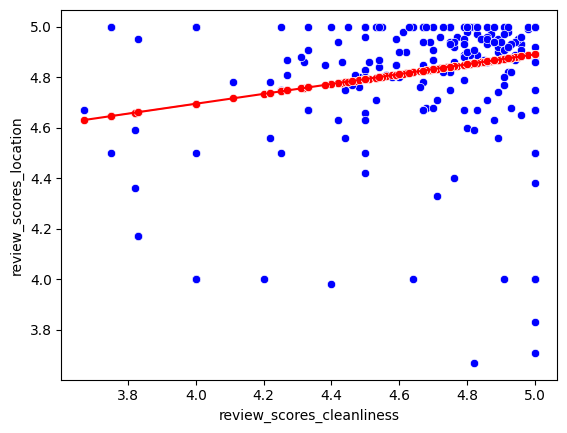

In [309]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',
                y='review_scores_location',
                color="blue",
                data=dfsr4)
sns.scatterplot(x='review_scores_cleanliness',
                y='Predicciones',
                color="red",
                data=dfsr4)
sns.lineplot(x='review_scores_cleanliness',
             y='Predicciones',
             color="red",
             data=dfsr4)

In [310]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd04=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd04

0.056042624145394626

In [311]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc04=np.sqrt(cd04)
cc04

0.23673323413791023

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

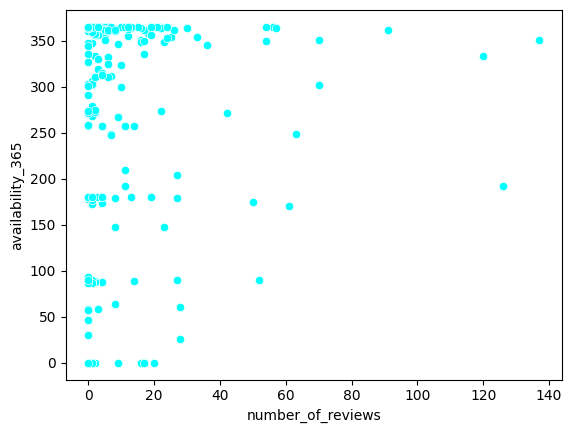

In [312]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='availability_365', color="cyan", data=dfsr)

In [313]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['number_of_reviews']]
Var_Dep= dfsr['availability_365']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)

modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.22117208]),
 'rank_': 1,
 'singular_': array([309.01946657]),
 'intercept_': 297.8061064299387}

y=297-0.221x

In [314]:
y_pred= modelPR.predict(X=dfsr[['number_of_reviews']])
y_pred

array([297.80610643, 295.81555769, 282.32406064, 292.27680436,
       267.50553109, 297.80610643, 297.80610643, 297.58493435,
       277.6794469 , 297.80610643, 297.36376226, 294.26735311,
       295.15204144, 297.80610643, 297.80610643, 297.80610643,
       286.30515813, 296.9214181 , 297.80610643, 296.47907393,
       297.80610643, 292.71914853, 294.26735311, 297.80610643,
       297.58493435, 297.80610643, 297.36376226, 271.2654565 ,
       297.58493435, 291.61328811, 297.58493435, 294.93086935,
       297.58493435, 296.25790185, 297.80610643, 297.80610643,
       296.03672977, 297.58493435, 297.80610643, 297.58493435,
       297.80610643, 297.80610643, 297.80610643, 297.14259018,
       295.15204144, 292.94032061, 297.58493435, 297.36376226,
       297.58493435, 296.9214181 , 296.03672977, 296.70024602,
       297.14259018, 297.58493435, 293.60383686, 296.70024602,
       297.14259018, 297.14259018, 297.80610643, 297.58493435,
       295.81555769, 285.4204698 , 284.31460938, 297.58

In [315]:
dfsr5 = dfsr.copy()

In [316]:
#Insertamos la columna de predicciones en el DataFrame
dfsr5.insert(0, 'Predicciones', y_pred)
dfsr5

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,297.806106,Shared room,Shared room in rental unit,0.0,0.0,1815.0,0.0,4.98,4.92,365,0.69,4.94
437,295.815558,Shared room,Shared room in condo,86.0,50.0,182.0,9.0,4.78,4.67,346,0.10,5.00
443,282.324061,Shared room,Shared room in home,100.0,90.0,450.0,70.0,4.68,4.93,302,0.73,4.91
472,292.276804,Shared room,Shared room in guesthouse,96.0,100.0,272.0,25.0,4.80,4.48,354,0.26,4.72
499,267.505531,Shared room,Shared room in home,100.0,100.0,320.0,137.0,4.90,4.62,351,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
23733,297.806106,Shared room,Shared room in home,100.0,100.0,250.0,0.0,5.00,5.00,365,1.00,5.00
23762,297.806106,Shared room,Shared room in tent,100.0,100.0,224.0,0.0,5.00,5.00,364,1.00,4.00
23894,297.806106,Shared room,Shared room in rental unit,0.0,0.0,720.0,0.0,5.00,4.50,364,1.00,5.00
23898,297.806106,Shared room,Shared room in rental unit,0.0,100.0,176.0,0.0,5.00,4.50,364,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

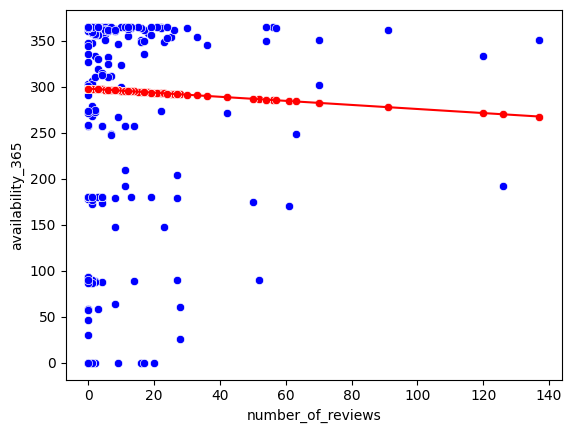

In [317]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews',
                y='availability_365',
                color="blue",
                data=dfsr5)
sns.scatterplot(x='number_of_reviews',
                y='Predicciones',
                color="red",
                data=dfsr5)
sns.lineplot(x='number_of_reviews',
             y='Predicciones',
             color="red",
             data=dfsr5)

In [318]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd05=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd05

0.0013880801890647776

In [319]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc05=np.sqrt(cd05)
cc05

0.037256948198487454

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

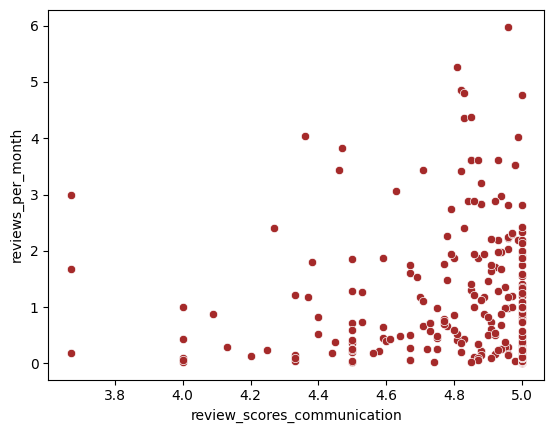

In [320]:
from turtle import color
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="brown", data=dfsr)

In [321]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['review_scores_communication']]
Var_Dep= dfsr['reviews_per_month']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep,y=Var_Dep)

modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.07558886]),
 'rank_': 1,
 'singular_': array([4.34004467]),
 'intercept_': 1.4002322848188145}

y=1.400-0.075x

In [322]:
y_pred= modelPR.predict(X=dfsr[['review_scores_communication']])
y_pred

array([1.02682333, 1.022288  , 1.029091  , 1.04345288, 1.02984688,
       1.022288  , 1.03135866, 1.022288  , 1.04496466, 1.04269699,
       1.06008243, 1.03135866, 1.02833511, 1.02531155, 1.02455566,
       1.02606744, 1.03891755, 1.07293253, 1.02606744, 1.06008243,
       1.03211455, 1.03211455, 1.02682333, 1.022288  , 1.022288  ,
       1.022288  , 1.022288  , 1.02833511, 1.022288  , 1.022288  ,
       1.06008243, 1.06008243, 1.022288  , 1.03287044, 1.02757922,
       1.02304389, 1.03135866, 1.022288  , 1.029091  , 1.03211455,
       1.06461776, 1.02531155, 1.02531155, 1.03211455, 1.05403532,
       1.05327943, 1.022288  , 1.022288  , 1.02531155, 1.09787686,
       1.022288  , 1.022288  , 1.04723232, 1.0419411 , 1.02606744,
       1.05252354, 1.04723232, 1.02531155, 1.06008243, 1.022288  ,
       1.0555471 , 1.02531155, 1.03362633, 1.03362633, 1.0880503 ,
       1.04723232, 1.04420877, 1.02531155, 1.022288  , 1.02682333,
       1.02682333, 1.02682333, 1.022288  , 1.022288  , 1.05327

In [323]:
dfsr6 = dfsr.copy()

In [324]:
#Insertamos la columna de predicciones en el DataFrame
dfsr6.insert(0, 'Predicciones', y_pred)
dfsr6

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,1.026823,Shared room,Shared room in rental unit,0.0,0.0,1815.0,0.0,4.98,4.92,365,0.69,4.94
437,1.022288,Shared room,Shared room in condo,86.0,50.0,182.0,9.0,4.78,4.67,346,0.10,5.00
443,1.029091,Shared room,Shared room in home,100.0,90.0,450.0,70.0,4.68,4.93,302,0.73,4.91
472,1.043453,Shared room,Shared room in guesthouse,96.0,100.0,272.0,25.0,4.80,4.48,354,0.26,4.72
499,1.029847,Shared room,Shared room in home,100.0,100.0,320.0,137.0,4.90,4.62,351,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
23733,1.022288,Shared room,Shared room in home,100.0,100.0,250.0,0.0,5.00,5.00,365,1.00,5.00
23762,1.097877,Shared room,Shared room in tent,100.0,100.0,224.0,0.0,5.00,5.00,364,1.00,4.00
23894,1.022288,Shared room,Shared room in rental unit,0.0,0.0,720.0,0.0,5.00,4.50,364,1.00,5.00
23898,1.022288,Shared room,Shared room in rental unit,0.0,100.0,176.0,0.0,5.00,4.50,364,1.00,5.00


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

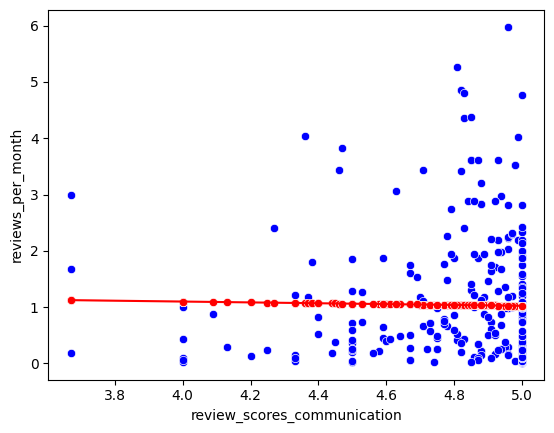

In [325]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication',
                y='reviews_per_month',
                color="blue",
                data=dfsr6)
sns.scatterplot(x='review_scores_communication',
                y='Predicciones',
                color="red",
                data=dfsr6)
sns.lineplot(x='review_scores_communication',
             y='Predicciones',
             color="red",
             data=dfsr6)

In [326]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd06=modelPR.score(X=Vars_Indep, y=Var_Dep)
cd06

0.00027305797007937116

In [327]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc06=np.sqrt(cd06)
cc06

0.016524465803146895

#Private room

In [328]:
dfpr = df4[df4['room_type'] == 'Private room']
dfpr

,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,Private room,Private room in home,100.0,100.0,1089.0,62.0,4.94,4.90,168,0.94,4.95
16,Private room,Private room in rental unit,0.0,0.0,726.0,5.0,4.80,4.20,363,0.04,4.60
17,Private room,Private room in home,0.0,0.0,375.0,5.0,4.40,4.60,284,0.04,4.80
18,Private room,Private room in rental unit,0.0,0.0,2835.0,0.0,4.89,5.00,365,0.12,4.78
21,Private room,Private room,0.0,100.0,1244.0,0.0,5.00,4.91,88,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...
24200,Private room,Private room in rental unit,0.0,0.0,1280.0,0.0,5.00,5.00,301,1.00,5.00
24213,Private room,Private room in rental unit,0.0,0.0,750.0,0.0,5.00,5.00,176,1.00,5.00
24215,Private room,Private room in rental unit,100.0,100.0,600.0,0.0,5.00,5.00,345,1.00,5.00
24218,Private room,Private room in home,100.0,0.0,251.0,0.0,5.00,5.00,364,1.00,5.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

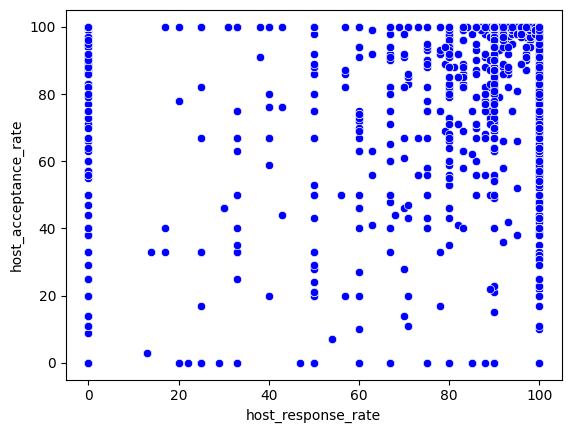

In [329]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfpr)

In [330]:
Vars_Indep= dfpr[['host_response_rate']]
Var_Dep= dfpr['host_acceptance_rate']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.55580628]),
 'rank_': 1,
 'singular_': array([3696.53230644]),
 'intercept_': 35.79093332179936}

y=35.79+0.55x

In [331]:
y_pred= model.predict(X=dfpr[['host_response_rate']])
y_pred

array([91.37156099, 35.79093332, 35.79093332, ..., 91.37156099,
       35.79093332, 35.79093332])

In [332]:
dfpr1 = dfpr.copy()

In [333]:
dfpr1.insert(0, 'Predicciones', y_pred)
dfpr1

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,91.371561,Private room,Private room in home,100.0,100.0,1089.0,62.0,4.94,4.90,168,0.94,4.95
16,35.790933,Private room,Private room in rental unit,0.0,0.0,726.0,5.0,4.80,4.20,363,0.04,4.60
17,35.790933,Private room,Private room in home,0.0,0.0,375.0,5.0,4.40,4.60,284,0.04,4.80
18,35.790933,Private room,Private room in rental unit,0.0,0.0,2835.0,0.0,4.89,5.00,365,0.12,4.78
21,91.371561,Private room,Private room,0.0,100.0,1244.0,0.0,5.00,4.91,88,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,35.790933,Private room,Private room in rental unit,0.0,0.0,1280.0,0.0,5.00,5.00,301,1.00,5.00
24213,35.790933,Private room,Private room in rental unit,0.0,0.0,750.0,0.0,5.00,5.00,176,1.00,5.00
24215,91.371561,Private room,Private room in rental unit,100.0,100.0,600.0,0.0,5.00,5.00,345,1.00,5.00
24218,35.790933,Private room,Private room in home,100.0,0.0,251.0,0.0,5.00,5.00,364,1.00,5.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

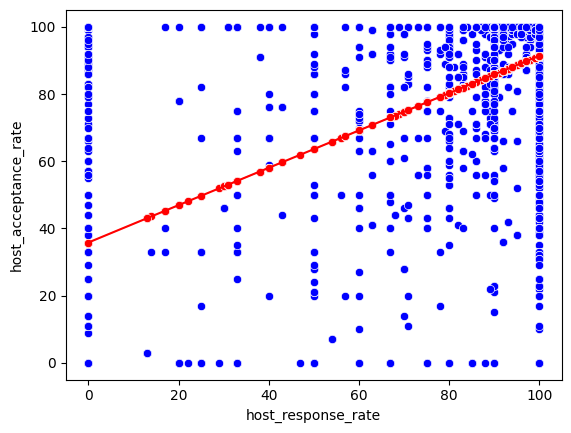

In [334]:
sns.scatterplot(x='host_response_rate',
                y='host_acceptance_rate',
                color="blue",
                data=dfpr1)
sns.scatterplot(x='host_response_rate',
                y='Predicciones',
                color="red",
                data=dfpr1)
sns.lineplot(x='host_response_rate',
             y='Predicciones',
             color="red",
             data=dfpr1)

In [335]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd07=model.score(X=Vars_Indep, y=Var_Dep)
cd07

0.38240696595282164

In [336]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc07=np.sqrt(cd07)
cc07

0.6183906256993403

<Axes: xlabel='price', ylabel='host_response_rate'>

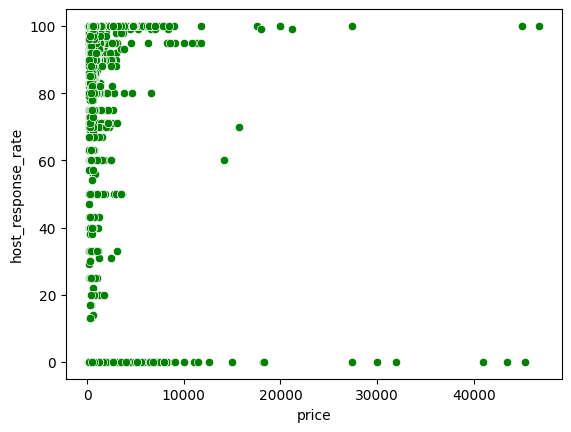

In [337]:
from turtle import color
sns.scatterplot(x='price', y='host_response_rate', color="green", data=dfpr)

In [338]:
Vars_Indep= dfpr[['price']]
Var_Dep= dfpr['host_acceptance_rate']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00145081]),
 'rank_': 1,
 'singular_': array([155350.79760407]),
 'intercept_': 78.51633410470033}

y=78.51-0.001x

In [339]:
y_pred= model.predict(X=dfpr[['price']])
y_pred

array([76.93639805, 77.4630434 , 77.97227899, ..., 77.64584592,
       78.15217988, 77.74305043])

In [340]:
dfpr2 = dfpr.copy()

In [341]:
#Insertamos la columna de predicciones en el DataFrame
dfpr2.insert(0, 'Predicciones', y_pred)
dfpr2

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,76.936398,Private room,Private room in home,100.0,100.0,1089.0,62.0,4.94,4.90,168,0.94,4.95
16,77.463043,Private room,Private room in rental unit,0.0,0.0,726.0,5.0,4.80,4.20,363,0.04,4.60
17,77.972279,Private room,Private room in home,0.0,0.0,375.0,5.0,4.40,4.60,284,0.04,4.80
18,74.403277,Private room,Private room in rental unit,0.0,0.0,2835.0,0.0,4.89,5.00,365,0.12,4.78
21,76.711522,Private room,Private room,0.0,100.0,1244.0,0.0,5.00,4.91,88,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,76.659293,Private room,Private room in rental unit,0.0,0.0,1280.0,0.0,5.00,5.00,301,1.00,5.00
24213,77.428224,Private room,Private room in rental unit,0.0,0.0,750.0,0.0,5.00,5.00,176,1.00,5.00
24215,77.645846,Private room,Private room in rental unit,100.0,100.0,600.0,0.0,5.00,5.00,345,1.00,5.00
24218,78.152180,Private room,Private room in home,100.0,0.0,251.0,0.0,5.00,5.00,364,1.00,5.00


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

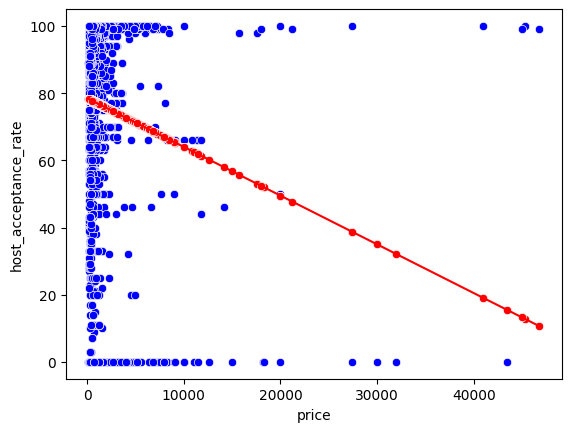

In [342]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price',
                y='host_acceptance_rate',
                color="blue",
                data=dfpr2)
sns.scatterplot(x='price',
                y='Predicciones',
                color="red",
                data=dfpr2)
sns.lineplot(x='price',
             y='Predicciones',
             color="red",
             data=dfpr2)

In [343]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd08=model.score(X=Vars_Indep, y=Var_Dep)
cd08

0.004601931230127643

In [344]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc08=np.sqrt(cd08)
cc08

0.06783753555464439

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

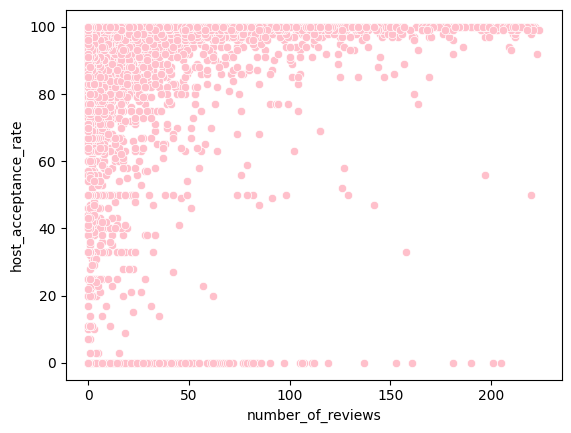

In [345]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=dfpr)

In [346]:
Vars_Indep= dfpr[['number_of_reviews']]
Var_Dep= dfpr['host_acceptance_rate']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.21272219]),
 'rank_': 1,
 'singular_': array([3316.00075021]),
 'intercept_': 72.72674174228186}

y=72.72+0.212x

In [347]:
y_pred= model.predict(X=dfpr[['number_of_reviews']])
y_pred

array([85.91551751, 73.79035269, 73.79035269, ..., 72.72674174,
       72.72674174, 72.72674174])

In [348]:
dfpr3 = dfpr.copy()

In [349]:
#Insertamos la columna de predicciones en el DataFrame
dfpr3.insert(0, 'Predicciones', y_pred)
dfpr3

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,85.915518,Private room,Private room in home,100.0,100.0,1089.0,62.0,4.94,4.90,168,0.94,4.95
16,73.790353,Private room,Private room in rental unit,0.0,0.0,726.0,5.0,4.80,4.20,363,0.04,4.60
17,73.790353,Private room,Private room in home,0.0,0.0,375.0,5.0,4.40,4.60,284,0.04,4.80
18,72.726742,Private room,Private room in rental unit,0.0,0.0,2835.0,0.0,4.89,5.00,365,0.12,4.78
21,72.726742,Private room,Private room,0.0,100.0,1244.0,0.0,5.00,4.91,88,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,72.726742,Private room,Private room in rental unit,0.0,0.0,1280.0,0.0,5.00,5.00,301,1.00,5.00
24213,72.726742,Private room,Private room in rental unit,0.0,0.0,750.0,0.0,5.00,5.00,176,1.00,5.00
24215,72.726742,Private room,Private room in rental unit,100.0,100.0,600.0,0.0,5.00,5.00,345,1.00,5.00
24218,72.726742,Private room,Private room in home,100.0,0.0,251.0,0.0,5.00,5.00,364,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

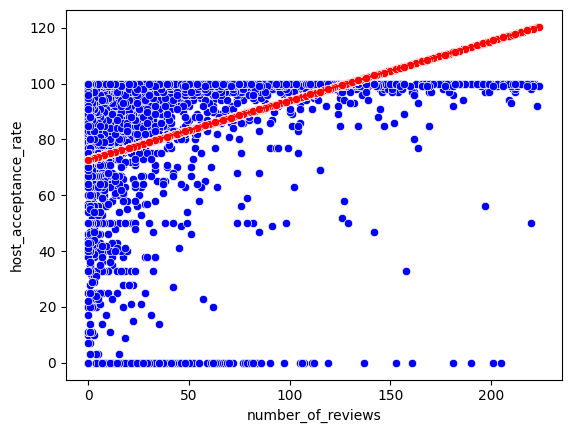

In [350]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews',
                y='host_acceptance_rate',
                color="blue",
                data=dfpr3)
sns.scatterplot(x='number_of_reviews',
                y='Predicciones',
                color="red",
                data=dfpr3)
sns.lineplot(x='number_of_reviews',
             y='Predicciones',
             color="red",
             data=dfpr3)

In [351]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd09=model.score(X=Vars_Indep, y=Var_Dep)
cd09

0.0450759324327773

In [352]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc09=np.sqrt(cd09)
cc09

0.21231093338021315

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

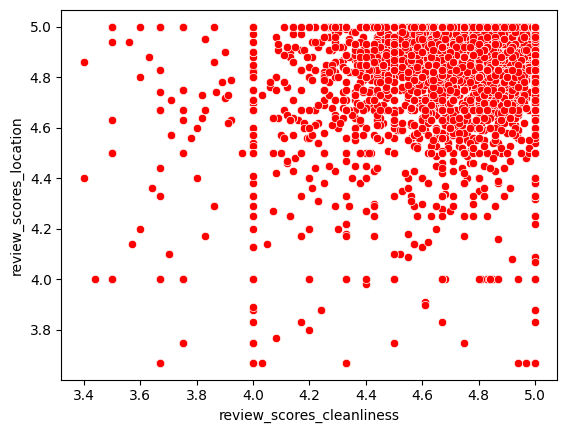

In [353]:
from turtle import color
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="red", data=dfpr)

In [354]:
Vars_Indep= dfpr[['review_scores_cleanliness']]
Var_Dep= dfpr['review_scores_location']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.28241358]),
 'rank_': 1,
 'singular_': array([25.10099396]),
 'intercept_': 3.5177474855571003}

y=3.517+0.28x

In [355]:
y_pred= model.predict(X=dfpr[['review_scores_cleanliness']])
y_pred

array([4.90157405, 4.70388454, 4.81684997, ..., 4.92981541, 4.92981541,
       4.92981541])

In [356]:
dfpr4 = dfpr.copy()

In [357]:
#Insertamos la columna de predicciones en el DataFrame
dfpr4.insert(0, 'Predicciones', y_pred)
dfpr4

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,4.901574,Private room,Private room in home,100.0,100.0,1089.0,62.0,4.94,4.90,168,0.94,4.95
16,4.703885,Private room,Private room in rental unit,0.0,0.0,726.0,5.0,4.80,4.20,363,0.04,4.60
17,4.816850,Private room,Private room in home,0.0,0.0,375.0,5.0,4.40,4.60,284,0.04,4.80
18,4.929815,Private room,Private room in rental unit,0.0,0.0,2835.0,0.0,4.89,5.00,365,0.12,4.78
21,4.904398,Private room,Private room,0.0,100.0,1244.0,0.0,5.00,4.91,88,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,4.929815,Private room,Private room in rental unit,0.0,0.0,1280.0,0.0,5.00,5.00,301,1.00,5.00
24213,4.929815,Private room,Private room in rental unit,0.0,0.0,750.0,0.0,5.00,5.00,176,1.00,5.00
24215,4.929815,Private room,Private room in rental unit,100.0,100.0,600.0,0.0,5.00,5.00,345,1.00,5.00
24218,4.929815,Private room,Private room in home,100.0,0.0,251.0,0.0,5.00,5.00,364,1.00,5.00


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

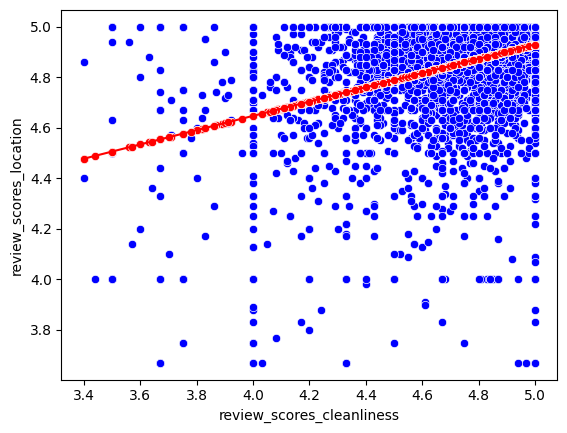

In [358]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',
                y='review_scores_location',
                color="blue",
                data=dfpr4)
sns.scatterplot(x='review_scores_cleanliness',
                y='Predicciones',
                color="red",
                data=dfpr4)
sns.lineplot(x='review_scores_cleanliness',
             y='Predicciones',
             color="red",
             data=dfpr4)

In [359]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd10=model.score(X=Vars_Indep, y=Var_Dep)
cd10

0.13176558189481358

In [360]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc10=np.sqrt(cd10)
cc10

0.3629952918356016

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

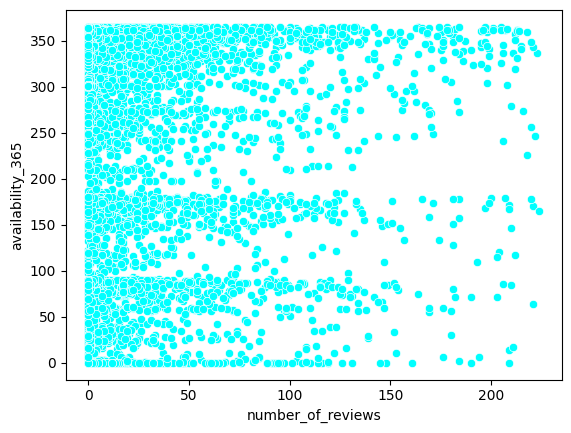

In [361]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='availability_365', color="cyan", data=dfpr)

In [362]:
Vars_Indep= dfpr[['number_of_reviews']]
Var_Dep= dfpr['availability_365']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.20045028]),
 'rank_': 1,
 'singular_': array([3316.00075021]),
 'intercept_': 257.32298350513696}

y=257.32-0.2004x

In [363]:
y_pred= model.predict(X=dfpr[['number_of_reviews']])
y_pred

array([244.89506584, 256.32073208, 256.32073208, ..., 257.32298351,
       257.32298351, 257.32298351])

In [364]:
dfpr5 = dfpr.copy()

In [365]:
#Insertamos la columna de predicciones en el DataFrame
dfpr5.insert(0, 'Predicciones', y_pred)
dfpr5

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,244.895066,Private room,Private room in home,100.0,100.0,1089.0,62.0,4.94,4.90,168,0.94,4.95
16,256.320732,Private room,Private room in rental unit,0.0,0.0,726.0,5.0,4.80,4.20,363,0.04,4.60
17,256.320732,Private room,Private room in home,0.0,0.0,375.0,5.0,4.40,4.60,284,0.04,4.80
18,257.322984,Private room,Private room in rental unit,0.0,0.0,2835.0,0.0,4.89,5.00,365,0.12,4.78
21,257.322984,Private room,Private room,0.0,100.0,1244.0,0.0,5.00,4.91,88,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,257.322984,Private room,Private room in rental unit,0.0,0.0,1280.0,0.0,5.00,5.00,301,1.00,5.00
24213,257.322984,Private room,Private room in rental unit,0.0,0.0,750.0,0.0,5.00,5.00,176,1.00,5.00
24215,257.322984,Private room,Private room in rental unit,100.0,100.0,600.0,0.0,5.00,5.00,345,1.00,5.00
24218,257.322984,Private room,Private room in home,100.0,0.0,251.0,0.0,5.00,5.00,364,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

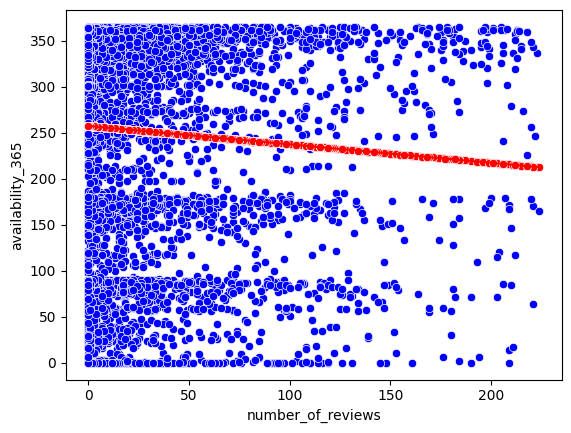

In [366]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews',
                y='availability_365',
                color="blue",
                data=dfpr5)
sns.scatterplot(x='number_of_reviews',
                y='Predicciones',
                color="red",
                data=dfpr5)
sns.lineplot(x='number_of_reviews',
             y='Predicciones',
             color="red",
             data=dfpr5)

In [367]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd11=model.score(X=Vars_Indep, y=Var_Dep)
cd11

0.003439757759259643

In [368]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc11=np.sqrt(cd11)
cc11

0.05864944807293282

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

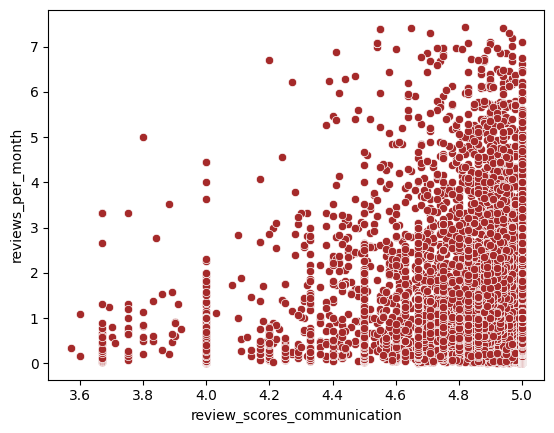

In [369]:
from turtle import color
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="brown", data=dfpr)

In [370]:
Vars_Indep= dfpr[['review_scores_communication']]
Var_Dep= dfpr['reviews_per_month']

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.24830514]),
 'rank_': 1,
 'singular_': array([20.90109595]),
 'intercept_': 2.4680990982285946}

y=2.468-0.2483x

In [371]:
y_pred= model.predict(X=dfpr[['review_scores_communication']])
y_pred

array([1.23898867, 1.32589547, 1.27623444, ..., 1.22657341, 1.22657341,
       1.22657341])

In [372]:
dfpr6 = dfpr.copy()

In [373]:
#Insertamos la columna de predicciones en el DataFrame
dfpr6.insert(0, 'Predicciones', y_pred)
dfpr6

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,1.238989,Private room,Private room in home,100.0,100.0,1089.0,62.0,4.94,4.90,168,0.94,4.95
16,1.325895,Private room,Private room in rental unit,0.0,0.0,726.0,5.0,4.80,4.20,363,0.04,4.60
17,1.276234,Private room,Private room in home,0.0,0.0,375.0,5.0,4.40,4.60,284,0.04,4.80
18,1.281201,Private room,Private room in rental unit,0.0,0.0,2835.0,0.0,4.89,5.00,365,0.12,4.78
21,1.226573,Private room,Private room,0.0,100.0,1244.0,0.0,5.00,4.91,88,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,1.226573,Private room,Private room in rental unit,0.0,0.0,1280.0,0.0,5.00,5.00,301,1.00,5.00
24213,1.226573,Private room,Private room in rental unit,0.0,0.0,750.0,0.0,5.00,5.00,176,1.00,5.00
24215,1.226573,Private room,Private room in rental unit,100.0,100.0,600.0,0.0,5.00,5.00,345,1.00,5.00
24218,1.226573,Private room,Private room in home,100.0,0.0,251.0,0.0,5.00,5.00,364,1.00,5.00


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

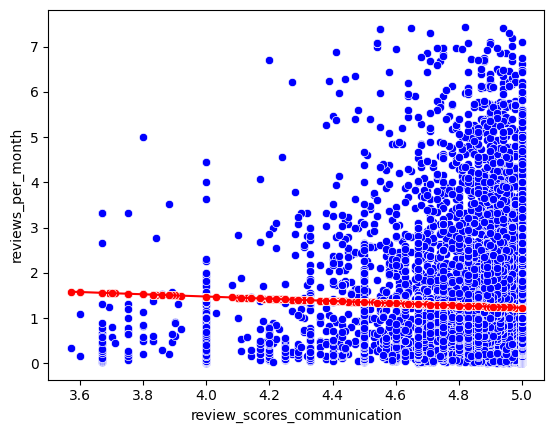

In [374]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication',
                y='reviews_per_month',
                color="blue",
                data=dfpr6)
sns.scatterplot(x='review_scores_communication',
                y='Predicciones',
                color="red",
                data=dfpr6)
sns.lineplot(x='review_scores_communication',
             y='Predicciones',
             color="red",
             data=dfpr6)

In [375]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
cd12=model.score(X=Vars_Indep, y=Var_Dep)
cd12

0.001735910302312904

In [376]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
cc12=np.sqrt(cd12)
cc12

0.04166425689140398

In [377]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsSR = dfsr.corr()
Corr_Factors1SR = Corr_FactorsSR.round(2)
Corr_Factors1SR

<ipython-input-377-b3e2ca4591f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_FactorsSR = dfsr.corr()


,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_acceptance_rate,1.00,0.72,-0.31,0.24,-0.06,-0.09,-0.03,0.04,-0.11
host_response_rate,0.72,1.00,-0.32,0.24,-0.03,-0.08,0.02,0.09,-0.12
price,-0.31,-0.32,1.00,-0.10,-0.08,-0.02,0.02,-0.02,0.07
number_of_reviews,0.24,0.24,-0.10,1.00,0.00,-0.10,-0.04,0.21,-0.10
review_scores_location,-0.06,-0.03,-0.08,0.00,1.00,0.24,0.05,-0.03,0.26
review_scores_cleanliness,-0.09,-0.08,-0.02,-0.10,0.24,1.00,0.10,0.07,0.44
availability_365,-0.03,0.02,0.02,-0.04,0.05,0.10,1.00,0.05,0.15
reviews_per_month,0.04,0.09,-0.02,0.21,-0.03,0.07,0.05,1.00,-0.02
review_scores_communication,-0.11,-0.12,0.07,-0.10,0.26,0.44,0.15,-0.02,1.00


In [378]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors2SR = abs(Corr_Factors1SR)
Corr_Factors2SR

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_acceptance_rate,1.00,0.72,0.31,0.24,0.06,0.09,0.03,0.04,0.11
host_response_rate,0.72,1.00,0.32,0.24,0.03,0.08,0.02,0.09,0.12
price,0.31,0.32,1.00,0.10,0.08,0.02,0.02,0.02,0.07
number_of_reviews,0.24,0.24,0.10,1.00,0.00,0.10,0.04,0.21,0.10
review_scores_location,0.06,0.03,0.08,0.00,1.00,0.24,0.05,0.03,0.26
review_scores_cleanliness,0.09,0.08,0.02,0.10,0.24,1.00,0.10,0.07,0.44
availability_365,0.03,0.02,0.02,0.04,0.05,0.10,1.00,0.05,0.15
reviews_per_month,0.04,0.09,0.02,0.21,0.03,0.07,0.05,1.00,0.02
review_scores_communication,0.11,0.12,0.07,0.10,0.26,0.44,0.15,0.02,1.00


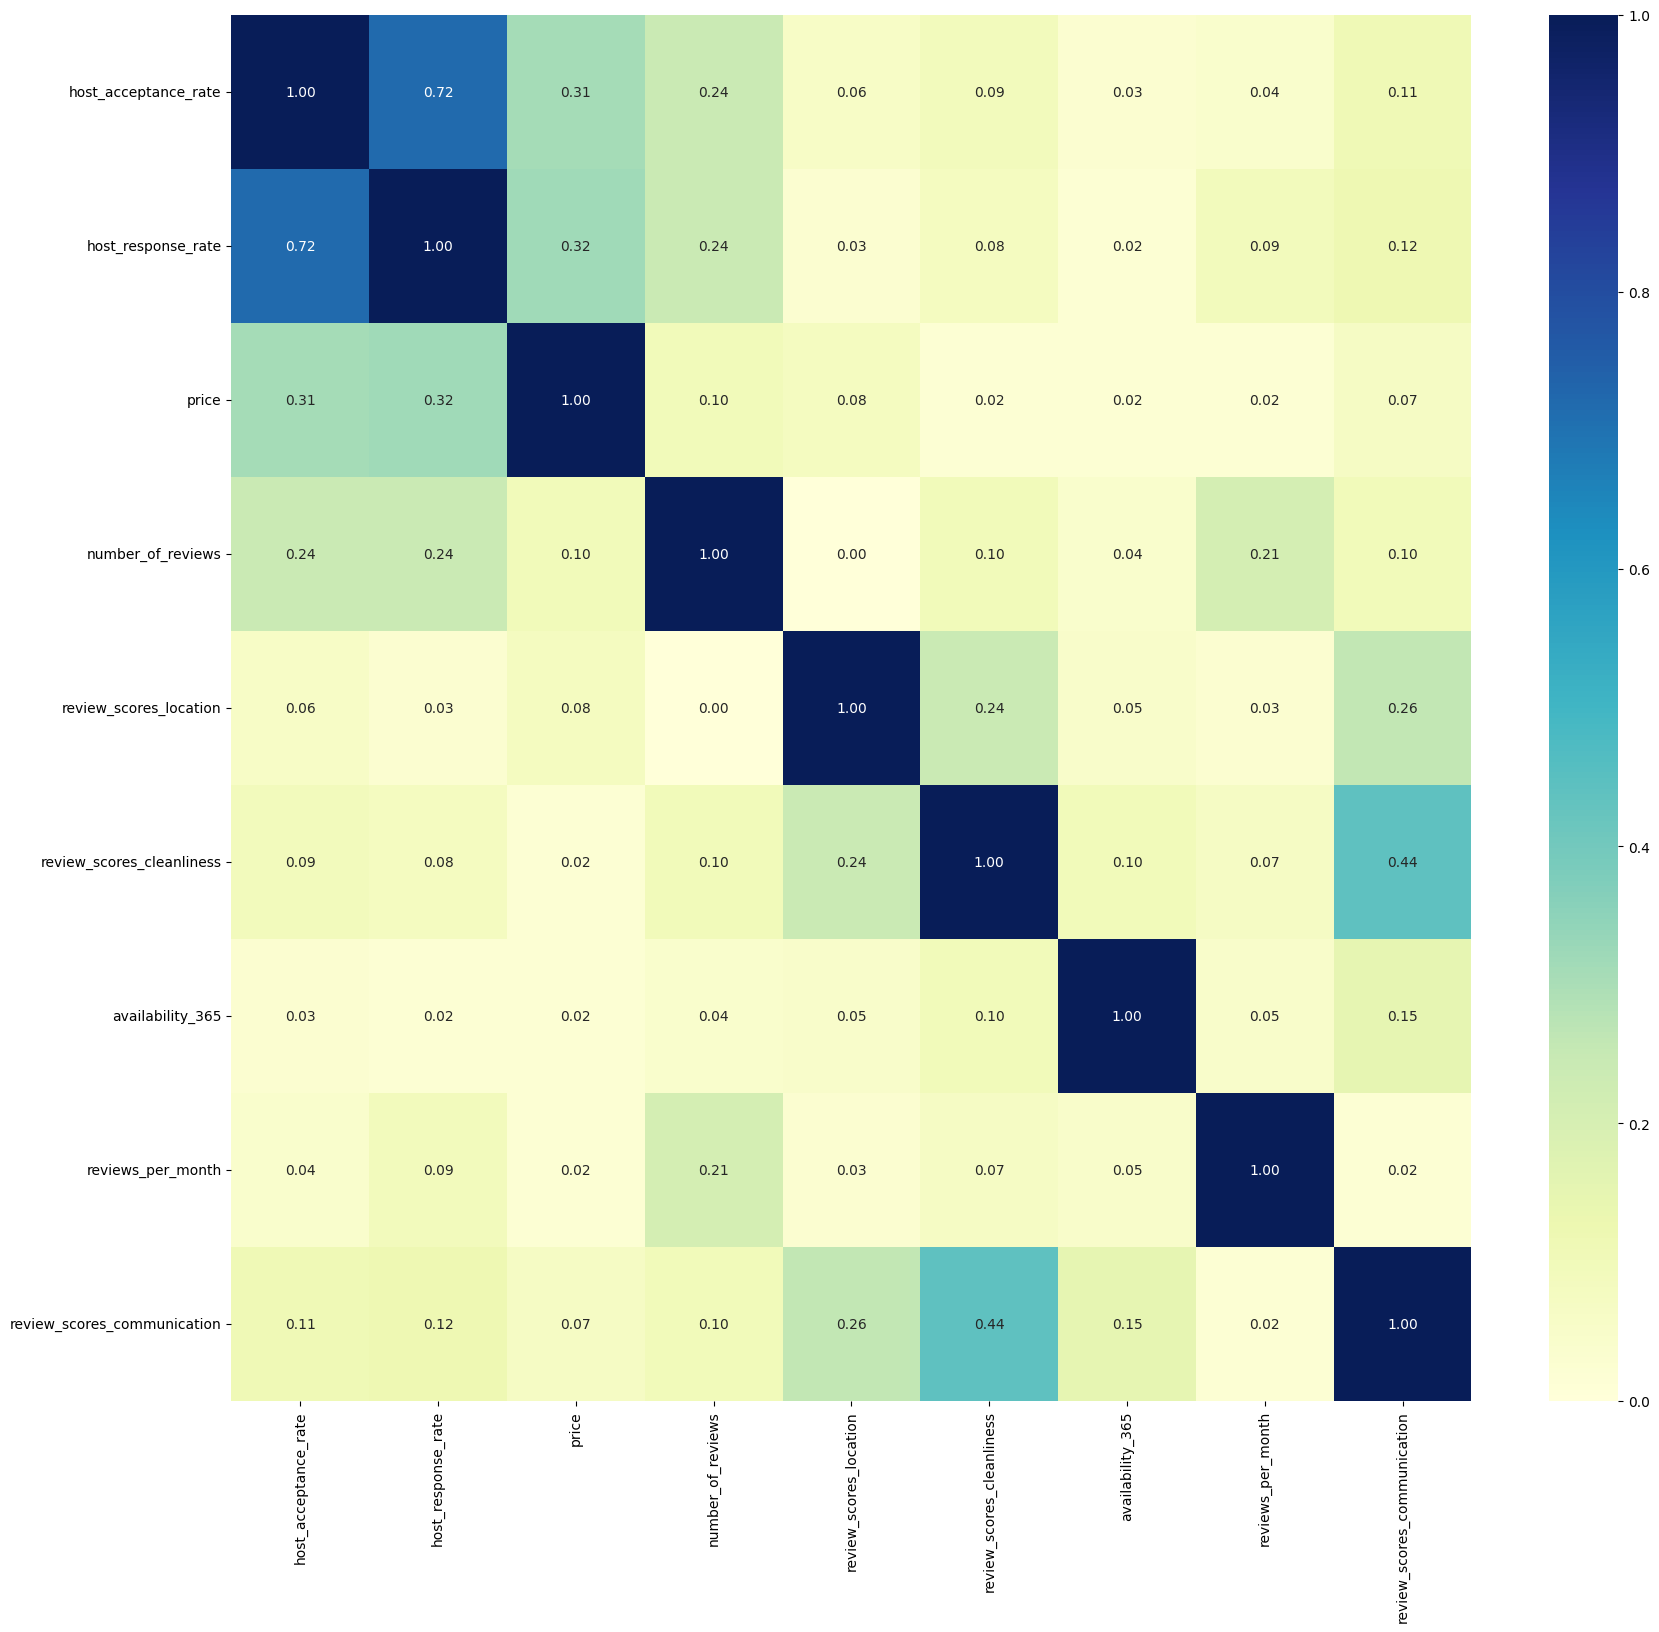

In [379]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 18))  # Puedes ajustar el tamaño (ancho, alto) según tus preferencias

# Crear el mapa de calor
Heat_MapSR = sns.heatmap(Corr_Factors2SR, cmap='YlGnBu', annot=True, fmt=".2f")

# Mostrar la gráfica
plt.show()

In [380]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['host_acceptance_rate']]
Var_Dep= dfsr['number_of_reviews']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep, y=Var_Dep)

modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.11359178]),
 'rank_': 1,
 'singular_': array([643.89382882]),
 'intercept_': 0.21846602579781482}

In [381]:
y_pred= modelPR.predict(X=dfsr[['host_acceptance_rate']])
y_pred

array([ 0.21846603,  9.98735911, 11.57764403, 11.12327691, 11.57764403,
        0.21846603,  7.71552351,  9.98735911, 10.78250157,  0.21846603,
        0.21846603, 10.66890979, 10.66890979,  7.71552351,  0.21846603,
        0.21846603,  9.53299199,  9.53299199,  3.96699477, 10.89609335,
        5.89805503, 10.89609335,  9.07862487,  0.21846603,  0.21846603,
        0.21846603,  7.82911529, 11.57764403,  0.21846603, 11.57764403,
        0.21846603, 11.57764403,  0.21846603,  0.55924137,  0.21846603,
        0.21846603,  8.05629885,  0.21846603, 11.57764403, 11.57764403,
        0.21846603,  0.21846603,  0.21846603, 11.57764403,  8.05629885,
       11.57764403, 11.57764403,  9.98735911, 11.57764403,  0.21846603,
       11.57764403, 11.57764403, 11.57764403,  3.96699477, 11.57764403,
       11.57764403, 11.57764403, 11.57764403,  5.89805503,  0.21846603,
        0.21846603, 11.46405225, 11.35046047,  0.21846603, 11.57764403,
       11.57764403, 11.57764403,  0.21846603, 11.57764403,  0.21

In [382]:
dfsr.insert(0, 'Predicciones', y_pred)
dfsr

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,0.218466,Shared room,Shared room in rental unit,0.0,0.0,1815.0,0.0,4.98,4.92,365,0.69,4.94
437,9.987359,Shared room,Shared room in condo,86.0,50.0,182.0,9.0,4.78,4.67,346,0.10,5.00
443,11.577644,Shared room,Shared room in home,100.0,90.0,450.0,70.0,4.68,4.93,302,0.73,4.91
472,11.123277,Shared room,Shared room in guesthouse,96.0,100.0,272.0,25.0,4.80,4.48,354,0.26,4.72
499,11.577644,Shared room,Shared room in home,100.0,100.0,320.0,137.0,4.90,4.62,351,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...
23733,11.577644,Shared room,Shared room in home,100.0,100.0,250.0,0.0,5.00,5.00,365,1.00,5.00
23762,11.577644,Shared room,Shared room in tent,100.0,100.0,224.0,0.0,5.00,5.00,364,1.00,4.00
23894,0.218466,Shared room,Shared room in rental unit,0.0,0.0,720.0,0.0,5.00,4.50,364,1.00,5.00
23898,0.218466,Shared room,Shared room in rental unit,0.0,100.0,176.0,0.0,5.00,4.50,364,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

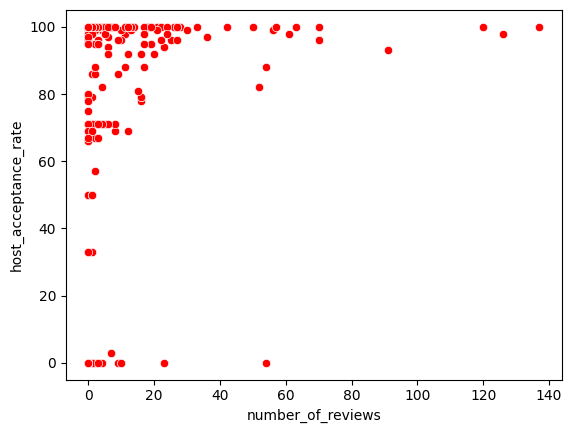

In [383]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=dfsr)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

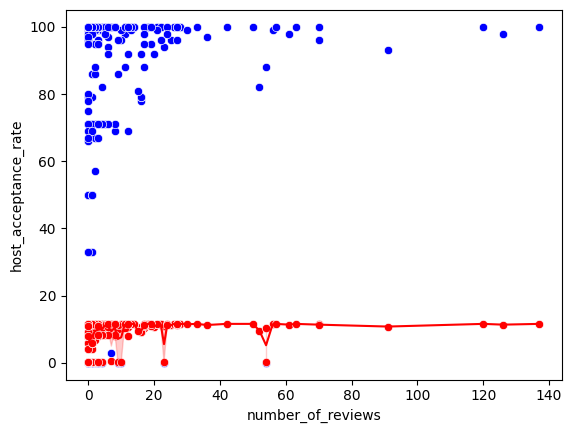

In [384]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfsr)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=dfsr)
sns.lineplot(x='number_of_reviews', y='Predicciones', color="red", data=dfsr)

In [385]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsPR = dfpr.corr()
Corr_Factors1PR = Corr_FactorsPR.round(2)
Corr_Factors1PR

<ipython-input-385-085f214f94d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_FactorsPR = dfpr.corr()


,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_acceptance_rate,1.00,0.62,-0.07,0.21,-0.02,-0.03,0.08,0.15,-0.07
host_response_rate,0.62,1.00,-0.08,0.23,-0.02,-0.05,0.09,0.16,-0.06
price,-0.07,-0.08,1.00,-0.08,0.02,0.03,0.06,-0.01,0.01
number_of_reviews,0.21,0.23,-0.08,1.00,0.04,-0.00,-0.06,0.38,-0.01
review_scores_location,-0.02,-0.02,0.02,0.04,1.00,0.36,-0.05,-0.02,0.42
review_scores_cleanliness,-0.03,-0.05,0.03,-0.00,0.36,1.00,-0.04,-0.01,0.46
availability_365,0.08,0.09,0.06,-0.06,-0.05,-0.04,1.00,0.06,-0.07
reviews_per_month,0.15,0.16,-0.01,0.38,-0.02,-0.01,0.06,1.00,-0.04
review_scores_communication,-0.07,-0.06,0.01,-0.01,0.42,0.46,-0.07,-0.04,1.00


In [386]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors2PR = abs(Corr_Factors1PR)
Corr_Factors2PR

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_acceptance_rate,1.00,0.62,0.07,0.21,0.02,0.03,0.08,0.15,0.07
host_response_rate,0.62,1.00,0.08,0.23,0.02,0.05,0.09,0.16,0.06
price,0.07,0.08,1.00,0.08,0.02,0.03,0.06,0.01,0.01
number_of_reviews,0.21,0.23,0.08,1.00,0.04,0.00,0.06,0.38,0.01
review_scores_location,0.02,0.02,0.02,0.04,1.00,0.36,0.05,0.02,0.42
review_scores_cleanliness,0.03,0.05,0.03,0.00,0.36,1.00,0.04,0.01,0.46
availability_365,0.08,0.09,0.06,0.06,0.05,0.04,1.00,0.06,0.07
reviews_per_month,0.15,0.16,0.01,0.38,0.02,0.01,0.06,1.00,0.04
review_scores_communication,0.07,0.06,0.01,0.01,0.42,0.46,0.07,0.04,1.00


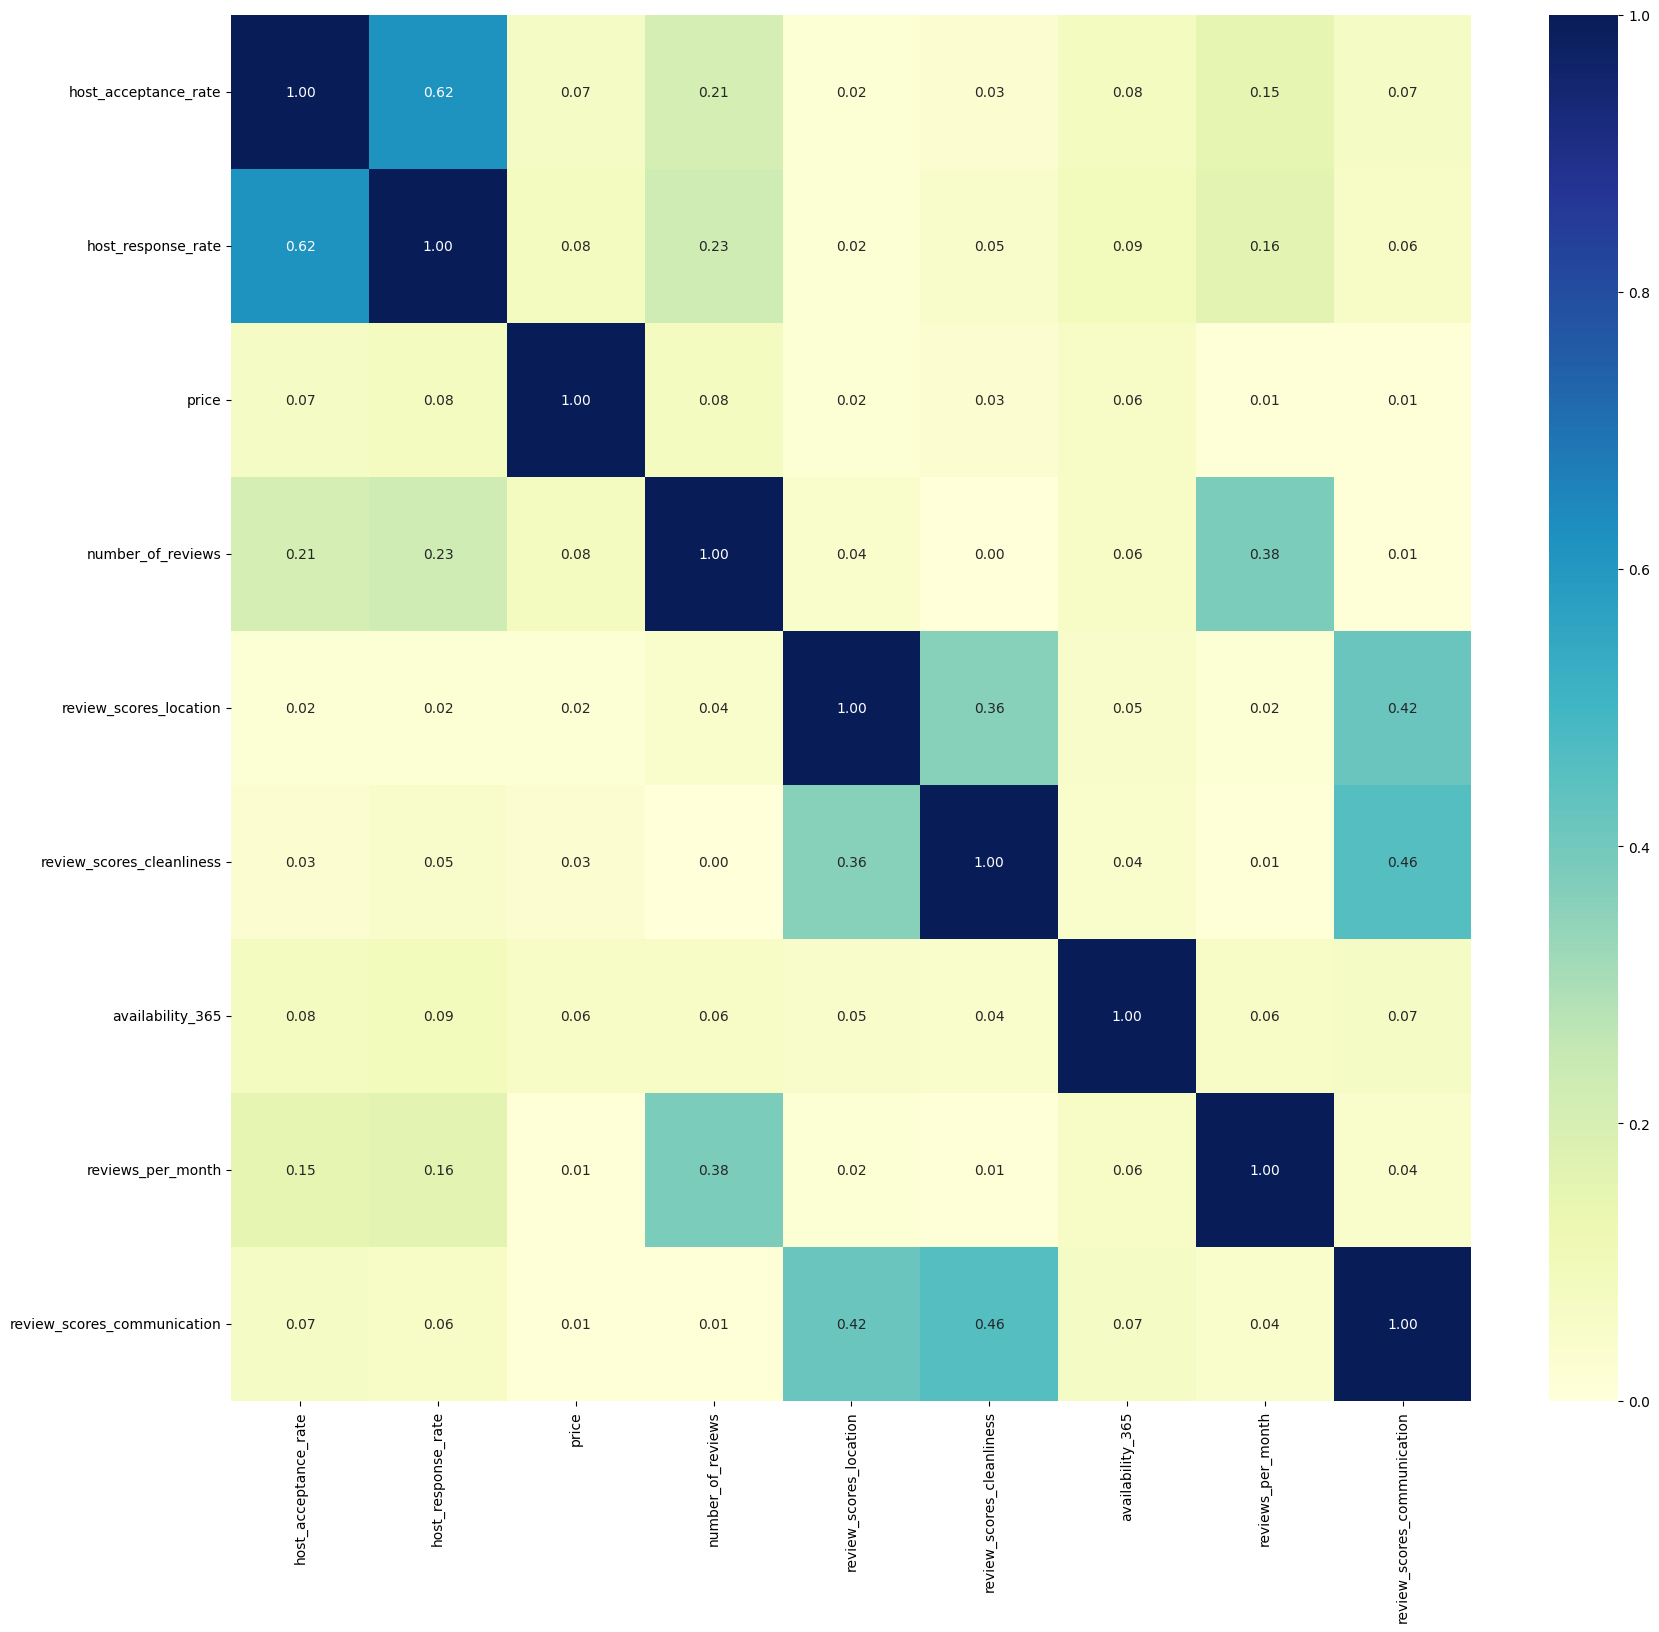

In [387]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 18))  # Puedes ajustar el tamaño (ancho, alto) según tus preferencias

# Crear el mapa de calor
Heat_MapPR = sns.heatmap(Corr_Factors2PR, cmap='YlGnBu', annot=True, fmt=".2f")

# Mostrar la gráfica
plt.show()

In [388]:
from sklearn.linear_model import LinearRegression

Vars_Indep= dfsr[['reviews_per_month']]
Var_Dep= dfsr['number_of_reviews']

modelPR = LinearRegression()

modelPR.fit(X=Vars_Indep, y=Var_Dep)

modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3.28812257]),
 'rank_': 1,
 'singular_': array([19.85292719]),
 'intercept_': 5.009257417039196}

In [389]:
y_pred= modelPR.predict(X=dfpr[['reviews_per_month']])
y_pred

array([8.10009264, 5.14078232, 5.14078232, ..., 8.29737999, 8.29737999,
       8.29737999])

In [390]:
dfpr.insert(0, 'Predicciones', y_pred)
dfpr

,Predicciones,room_type,property_type,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,8.100093,Private room,Private room in home,100.0,100.0,1089.0,62.0,4.94,4.90,168,0.94,4.95
16,5.140782,Private room,Private room in rental unit,0.0,0.0,726.0,5.0,4.80,4.20,363,0.04,4.60
17,5.140782,Private room,Private room in home,0.0,0.0,375.0,5.0,4.40,4.60,284,0.04,4.80
18,5.403832,Private room,Private room in rental unit,0.0,0.0,2835.0,0.0,4.89,5.00,365,0.12,4.78
21,5.338070,Private room,Private room,0.0,100.0,1244.0,0.0,5.00,4.91,88,0.10,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24200,8.297380,Private room,Private room in rental unit,0.0,0.0,1280.0,0.0,5.00,5.00,301,1.00,5.00
24213,8.297380,Private room,Private room in rental unit,0.0,0.0,750.0,0.0,5.00,5.00,176,1.00,5.00
24215,8.297380,Private room,Private room in rental unit,100.0,100.0,600.0,0.0,5.00,5.00,345,1.00,5.00
24218,8.297380,Private room,Private room in home,100.0,0.0,251.0,0.0,5.00,5.00,364,1.00,5.00


<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

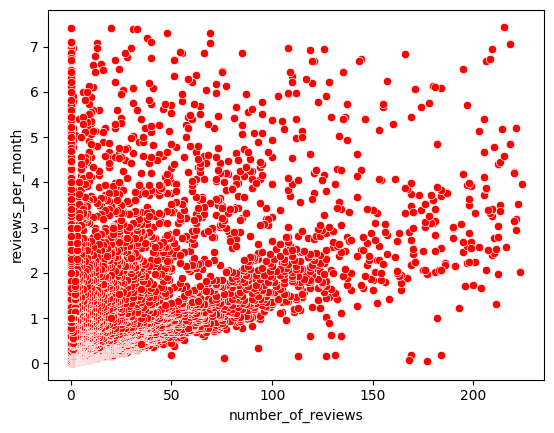

In [391]:
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="red", data=dfpr)

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

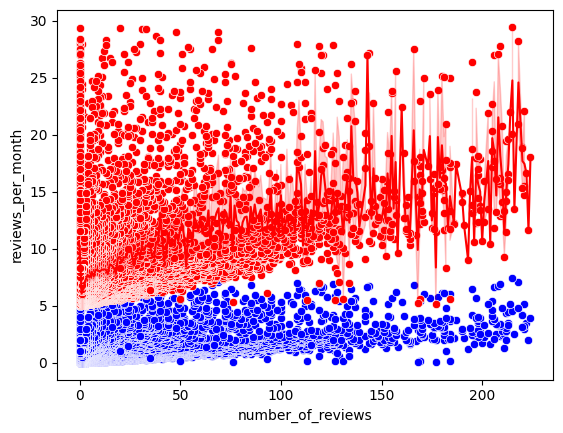

In [392]:
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="blue", data=dfpr)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=dfpr)
sns.lineplot(x='number_of_reviews', y='Predicciones', color="red", data=dfpr)

In [393]:
datos = {
    'coef y corr shared room': ['coef_Deter', 'coef_corr', 'coef_Deter2','coef_corr2', 'coef_Deter3', 'coef_corr3', 'coef_Deter4', 'coef_corr4', 'coef_Deter5', 'coef_corr5', 'coef_Deter6', 'coef_corr6'],
    'coeficiente': [cd01, cc01, cd02, cc02,cd03, cc03, cd04, cc04, cd05, cc05, cd06, cc06]
}
dff = pd.DataFrame(datos)
dff

,coef y corr shared room,coeficiente
0,coef_Deter,0.515030
1,coef_corr,0.717656
2,coef_Deter2,0.096813
3,coef_corr2,0.311148
4,coef_Deter3,0.056021
5,coef_corr3,0.236688
6,coef_Deter4,0.056043
7,coef_corr4,0.236733
8,coef_Deter5,0.001388
9,coef_corr5,0.037257


In [394]:
datos = {
    'coef y corr private room': ['coef_Deter', 'coef_corr', 'coef_Deter2','coef_corr2', 'coef_Deter3', 'coef_corr3', 'coef_Deter4', 'coef_corr4', 'coef_Deter5', 'coef_corr5', 'coef_Deter6', 'coef_corr6'],
    'coeficiente': [cd07, cc07, cd08, cc08,cd09, cc09, cd10, cc10, cd11, cc11, cd12, cc12]
}
dff = pd.DataFrame(datos)
dff

,coef y corr private room,coeficiente
0,coef_Deter,0.382407
1,coef_corr,0.618391
2,coef_Deter2,0.004602
3,coef_corr2,0.067838
4,coef_Deter3,0.045076
5,coef_corr3,0.212311
6,coef_Deter4,0.131766
7,coef_corr4,0.362995
8,coef_Deter5,0.003440
9,coef_corr5,0.058649
